In [47]:
#system libraries
import sys
import os

#some cool libraries
import scipy
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def isMono(data):
    if data.ndim == 1:
        return True
    elif data.shape[1] == 2:
        return False
    else:
        raise Exception('Excuse me what the fuck, Code: 0xQWERTY')

In [412]:
PATH = 'samples/Processed/'
ALIGN_LEFT_AND_RIGHT = True
DELETE_OLD_FILES = True

In [4]:
for root, dirs, files in os.walk(PATH, topdown=False):
    for name in files:
        inputfilepath = os.path.join(root, name)
        print(inputfilepath)

samples/Processed/Guitar Rig 5\1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold A#1.wav
samples/Processed/Guitar Rig 5\1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold A#2.wav
samples/Processed/Guitar Rig 5\1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold A1.wav
samples/Processed/Guitar Rig 5\1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold A2.wav
samples/Processed/Guitar Rig 5\1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold B1.wav
samples/Processed/Guitar Rig 5\1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold B2.wav
samples/Processed/Guitar Rig 5\1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold C#2.wav
samples/Processed/Guitar Rig 5\1993 Hot Solo Rig\Playable\Guitar Solo Short Hold Mono\Solo Guitar Short Hold C#3.wav
samples/Processed/Guitar Rig 5\1993 Hot Solo Rig\Playable\Guitar Sol

In [420]:
inputfilepath = 'samples/Processed/Guitar Rig 5\Riff Rocker\Playable\Palm Muted\Palm Muted LoDStr G1 L.wav'
if 'L.wav' in inputfilepath:
    LPATH = inputfilepath
    RPATH = LPATH.replace('L.wav','R.wav')
    SAVEPATH = LPATH.replace(' L.wav','.wav')

    if not os.path.isfile(RPATH):
        raise Exception('{} not found'.format(RPATH))

In [401]:
rateL, dataL = scipy.io.wavfile.read(LPATH)
rateR, dataR = scipy.io.wavfile.read(RPATH)

if rateL != rateR:
    raise Exception('Excuse me what the fuck, Code: 1!=0')

#Make mono if not already
if not isMono(dataL):
    dataL = dataL[:,0]
if not isMono(dataR):
    dataR = dataR[:,1]

In [402]:
if ALIGN_LEFT_AND_RIGHT:

##ALIGNMENT

In [403]:
## TEST delay one signal
#dataR = np.pad(dataL,(5000,0),'constant')

#make same length by zero padding
maxlength = max(dataL.shape[0],dataR.shape[0]) #both are not same size not. fill the shorter one with zeros
dataL = np.pad(dataL,(0,maxlength-dataL.shape[0]),'constant')
dataR = np.pad(dataR,(0,maxlength-dataR.shape[0]),'constant')

In [404]:
#ZeroPad behind, -> preparation for cross corellation function
dataL_0 = np.pad(dataL,(0,dataL.shape[0]),'constant')
dataR_0 = np.pad(dataR,(0,dataR.shape[0]),'constant')

#Calculate cross corellation:
#See: https://dsp.stackexchange.com/questions/736/how-do-i-implement-cross-correlation-to-prove-two-audio-files-are-similar

corr = np.fft.irfft(np.fft.rfft(dataL_0) * np.conj(np.fft.rfft(dataR_0)))
#corr = np.fft.irfft(np.fft.rfft(dataL_0) * np.fft.rfft(dataR_0[::-1]))

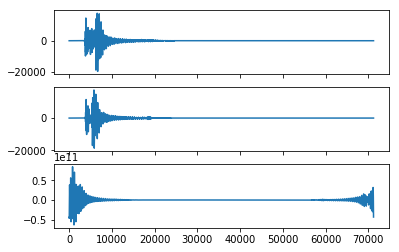

In [405]:
#fig, (pltL, pltR, pltCorr) = plt.subplots(3, 1, sharex=True)
#pltL.plot(dataL_0)
#pltR.plot(dataR_0)
#pltCorr.plot(corr)

In [406]:
#Corr is symmetrical but its zero point is at 0 and can can go to the end (cyclic shift)
#Distance of zeropoint (start or end of array) to peak is our searched time shift
arg_max = corr.argmax()
if arg_max > maxlength/2:  #L first, R delayed
    left_first = True
    shift = 2*maxlength - arg_max
else: #R first, L delayed
    left_first = False
    shift = arg_max
print(shift)

795


In [407]:
#compensate shift
if left_first:
    dataL = np.pad(dataL,(shift,0),'constant')
else:
    dataR = np.pad(dataR,(shift,0),'constant')

#make same length again by zero padding
maxlength = max(dataL.shape[0],dataR.shape[0]) #both are not same size not. fill the shorter one with zeros
dataL = np.pad(dataL,(0,maxlength-dataL.shape[0]),'constant')
dataR = np.pad(dataR,(0,maxlength-dataR.shape[0]),'constant')

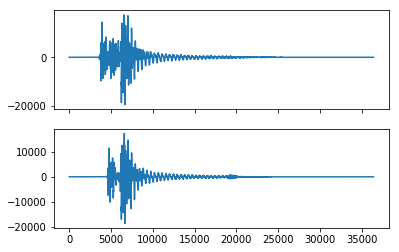

In [408]:
#fig, (pltL, pltR) = plt.subplots(2, 1, sharex=True)
#pltL.plot(dataL)
#pltR.plot(dataR)

In [411]:
# MERGE
outputdata = np.array([dataL, dataR]).T
# SAVE
scipy.io.wavfile.write(SAVEPATH, rateL, outputdata)

In [414]:
if DELETE_OLD_FILES:
    os.remove(LPATH)
    os.remove(RPATH)

5
